# Silhouette Score and Distance

## Create well clustered data

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import random as rnd

In [34]:
x_1 = [1,3,3,20,21,22]
x_2 = [2,1,4,19,18,24]
X = []
for num in range(0,6):
    X.append([x_1[num], x_2[num]] )
X = np.asarray(X)
X

array([[ 1,  2],
       [ 3,  1],
       [ 3,  4],
       [20, 19],
       [21, 18],
       [22, 24]])

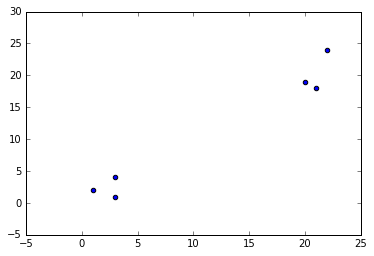

In [35]:
%matplotlib inline  
plt.scatter(x_1,x_2)
plt.show()

In [36]:
km = KMeans(n_clusters=2, init='k-means++', random_state=10)
cluster_labels = km.fit_predict(X)
cluster_distance = km.fit_transform(X)
cluster_distance

array([[  1.37436854,  27.13136766],
       [  1.49071198,  26.41548367],
       [  1.79505494,  24.30592063],
       [ 24.28762831,   1.66666667],
       [ 24.36983564,   2.33333333],
       [ 29.26127513,   3.80058475]])

This uses the original data to compute the average silhouette score

In [37]:
sil_avg = silhouette_score(X, cluster_labels)
sil_samples = silhouette_samples(X, cluster_labels)
sil_avg,sil_samples

(0.86646468774145324,
 array([ 0.90681291,  0.90102018,  0.88033829,  0.86014402,  0.84632062,
         0.8041521 ]))

This uses the distance matrix

In [38]:
sil_avg = silhouette_score(cluster_distance, cluster_labels)
sil_samples = silhouette_samples(cluster_distance, cluster_labels)
sil_avg,sil_samples

(0.91710410479810689,
 array([ 0.94855333,  0.95826809,  0.92341246,  0.90857585,  0.91203798,
         0.85177693]))

## Do the same with data that's not well clustered

In [39]:
x_1 = [1,2,3,1,3]
x_2 = [1,2,3,3,1]
X = []
for num in range(0,len(x_1)):
    X.append([x_1[num], x_2[num]] )
X = np.asarray(X)
X

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 3],
       [3, 1]])

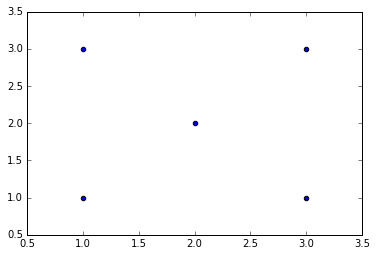

In [40]:
%matplotlib inline  
plt.scatter(x_1,x_2)
plt.show()

In [41]:
km = KMeans(n_clusters=2, init='k-means++', random_state=10)
cluster_labels = km.fit_predict(X)
cluster_distance = km.fit_transform(X)
cluster_distance

array([[ 1.05409255,  2.23606798],
       [ 0.66666667,  1.        ],
       [ 1.94365063,  1.        ],
       [ 1.05409255,  2.23606798],
       [ 1.94365063,  1.        ]])

This uses the original data to compute the average silhouette score

In [42]:
sil_avg = silhouette_score(X, cluster_labels)
sil_samples = silhouette_samples(X, cluster_labels)
sil_avg,sil_samples

(0.13270459830493214,
 array([ 0.29289322,  0.        ,  0.03886828,  0.29289322,  0.03886828]))

This uses the distance matrix

In [43]:
sil_avg = silhouette_score(cluster_distance, cluster_labels)
sil_samples = silhouette_samples(cluster_distance, cluster_labels)
sil_avg,sil_samples

(0.62704295236321361,
 array([ 0.57470119, -0.01418761,  1.        ,  0.57470119,  1.        ]))

I think the function is intended to take the original data. Most of what I've found online follows this usage. The unfortunate conclusion is that the lyrics data isn't very well clustered, but I'm going to go with it anyway.